In [76]:
import os
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [77]:
# case can be "rgb_rad, rgb_angle, depth_rad or depth_angle"

case = 'Lrgbd_rad'

ver = 0

In [78]:
data_path = './results/' + case.split('_')[0] + '_v' + str(ver) + '/graphs_data.csv'
df = pd.read_csv(data_path)

imgs = df.loc[:, 'Picture name']
gt_angles = df.loc[:, 'gt_angle']
gt_rads = df.loc[:, 'gt_rad']
pred_angles = df.loc[:, 'pred_angle']
pred_rads = df.loc[:, 'pred_rad']

save_path = './results/' + case.split('_')[0] + '_v' + str(ver) + '/'

Real vs predict angle

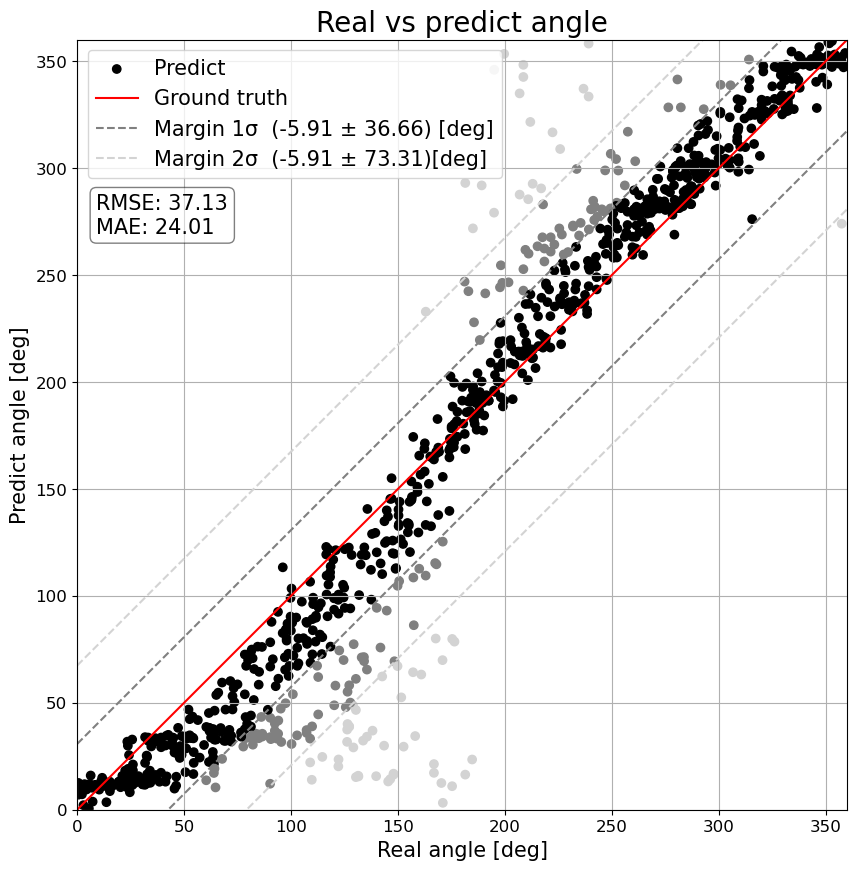

In [79]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Real vs predict angle', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('Predict angle [deg]', fontsize=15)
ax.set_xlabel('Real angle [deg]', fontsize=15)
ax.axis([0, 360, 0, 360])
ax.set_aspect('equal')
ax.grid()

# Filter out outliers
filtered_data = [(gt, pred) for gt, pred, rad in zip(gt_angles, pred_angles, gt_rads) if rad >= 2]
filtered_gts, filtered_preds = zip(*filtered_data)

# Calculate errors
errors = np.array(filtered_preds) - np.array(filtered_gts)

# Fit a normal distribution to the data
mu, std = norm.fit(errors)

# Define a threshold for outlier detection (e.g., 95% confidence interval)
lower_bound_1 = mu - 1 * std
upper_bound_1 = mu + 1 * std
lower_bound_2 = mu - 2 * std
upper_bound_2 = mu + 2 * std

colors = np.where((errors >= lower_bound_1) & (errors <= upper_bound_1), 'k', 'gray')
colors = np.where((errors >= lower_bound_2) & (errors <= upper_bound_2), colors, 'lightgray')

ax.scatter(filtered_gts, filtered_preds, color=colors, label='Predict')
x = np.linspace(0,360)
ax.plot(x, x, 'r', label='Ground truth')

# Calculate margin lines parallel to the perfect prediction line
ax.plot(x, x + lower_bound_1, linestyle='--', color='gray', label=f'Margin 1σ  ({mu:.2f} ± {1 * std:.2f}) [deg]')
ax.plot(x, x + upper_bound_1, linestyle='--', color='gray')

ax.plot(x, x + lower_bound_2, linestyle='--', color='lightgray', label=f'Margin 2σ  ({mu:.2f} ± {2 * std:.2f})[deg]')
ax.plot(x, x + upper_bound_2, linestyle='--', color='lightgray')


mae = np.mean(np.abs(np.array(filtered_preds) - np.array(filtered_gts)))
mse = np.mean([(pred - gt) ** 2 for pred, gt in zip(filtered_preds, filtered_gts)])
rmse = np.sqrt(mse)

ax.legend(fontsize=15)

textstr = f'RMSE: {rmse:.2f}\nMAE: {mae:.2f}'
props = dict(boxstyle='round', facecolor='w', alpha=0.5)
ax.text(0.025, 0.8, textstr, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)

plt.savefig(os.path.join(save_path, 'Real vs predict angle.png'))
plt.show()

Real vs predict radius

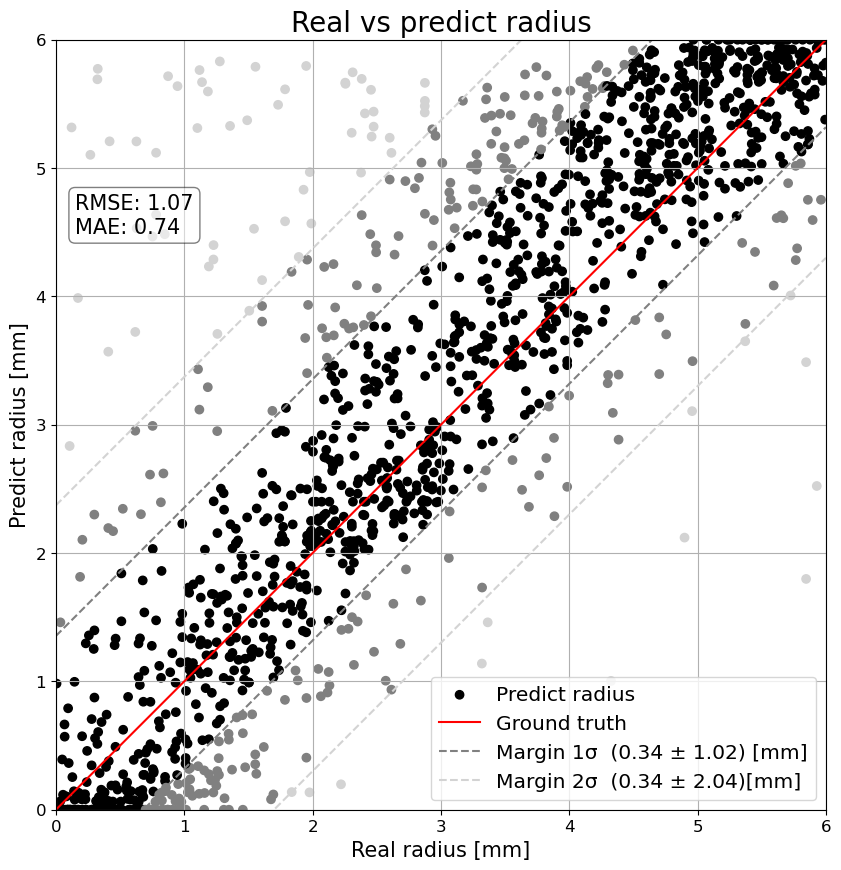

In [80]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Real vs predict radius', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('Predict radius [mm]', fontsize=15)
ax.set_xlabel('Real radius [mm]', fontsize=15)
ax.axis([0, 6, 0, 6])
ax.set_aspect('equal')
ax.grid()

# pred_rads = new_perd_rads
# gt_rads = new_gt_rads

# Calculate errors
errors = np.array(pred_rads) - np.array(gt_rads)

# Fit a normal distribution to the data
mu, std = norm.fit(errors)

# Define a threshold for outlier detection (e.g., 95% confidence interval)
lower_bound_1 = mu - 1 * std
upper_bound_1 = mu + 1 * std
lower_bound_2 = mu - 2 * std
upper_bound_2 = mu + 2 * std

colors = np.where((errors >= lower_bound_2) & (errors <= upper_bound_2), 'gray', 'lightgray')
colors = np.where((errors >= lower_bound_1) & (errors <= upper_bound_1), 'k', colors)


ax.scatter(gt_rads, pred_rads, color=colors, label='Predict radius')
x = np.linspace(0,6)
ax.plot(x, x, 'r', label='Ground truth')

# Calculate margin lines parallel to the perfect prediction line
ax.plot(x, x - abs(lower_bound_1), linestyle='--', color='gray', label=f'Margin 1σ  ({mu:.2f} ± {1 * std:.2f}) [mm]')
ax.plot(x, x + abs(upper_bound_1), linestyle='--', color='gray')

ax.plot(x, x - abs(lower_bound_2), linestyle='--', color='lightgray', label=f'Margin 2σ  ({mu:.2f} ± {2 * std:.2f})[mm]')
ax.plot(x, x + abs(upper_bound_2), linestyle='--', color='lightgray')

mae = np.mean(np.abs(np.array(pred_rads) - np.array(gt_rads)))
mse = np.mean([(pred - gt) ** 2 for pred, gt in zip(pred_rads, gt_rads)])
rmse = np.sqrt(mse)

ax.legend(fontsize=14.59)

textstr = f'RMSE: {rmse:.2f}\nMAE: {mae:.2f}'
props = dict(boxstyle='round', facecolor='w', alpha=0.5)
ax.text(0.025, 0.8, textstr, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)

plt.savefig(os.path.join(save_path, 'Real vs predict radius.png'))
plt.show()

Angle error vs radius

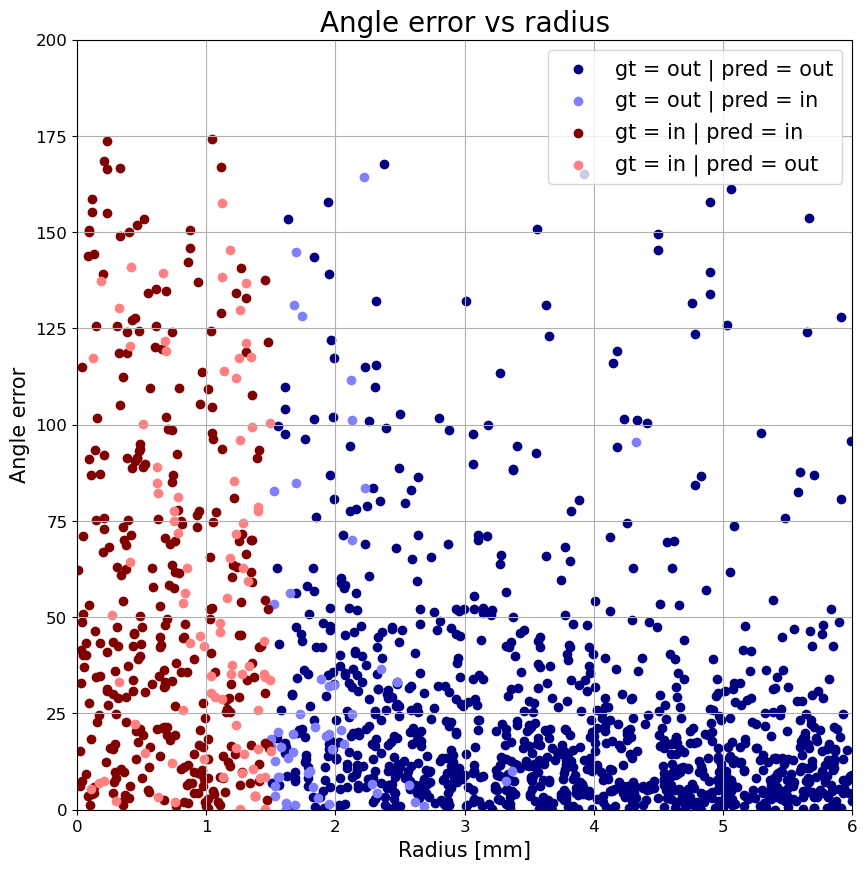

In [81]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Angle error vs radius', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('Angle error', fontsize=15)
ax.set_xlabel('Radius [mm]', fontsize=15)
ax.axis([0, 6, 0, 200])
ax.grid()

InOut_val = 1.5

# Filter data based on predicted and real radius
out_out_data = df[(pred_rads > InOut_val) & (gt_rads > InOut_val)]
in_in_data = df[(pred_rads < InOut_val) & (gt_rads < InOut_val)]
in_out_data = df[(pred_rads > InOut_val) & (gt_rads < InOut_val)]
out_in_data = df[(pred_rads < InOut_val) & (gt_rads > InOut_val)]

# Plot data points for different cases
ax.scatter(out_out_data['gt_rad'], np.abs(out_out_data['gt_angle'] - out_out_data['pred_angle']), color=[0,0,0.5], label='gt = out | pred = out')
ax.scatter(out_in_data['gt_rad'], np.abs(out_in_data['gt_angle'] - out_in_data['pred_angle']), color=[0.5,0.5,1], label='gt = out | pred = in')
ax.scatter(in_in_data['gt_rad'], np.abs(in_in_data['gt_angle'] - in_in_data['pred_angle']), color=[0.5,0,0], label='gt = in | pred = in')
ax.scatter(in_out_data['gt_rad'], np.abs(in_out_data['gt_angle'] - in_out_data['pred_angle']), color=[1,0.5,0.5], label='gt = in | pred = out')

ax.legend(fontsize=15)

plt.savefig(os.path.join(save_path, 'Angle error vs radius.png'))
plt.show()

in out pred

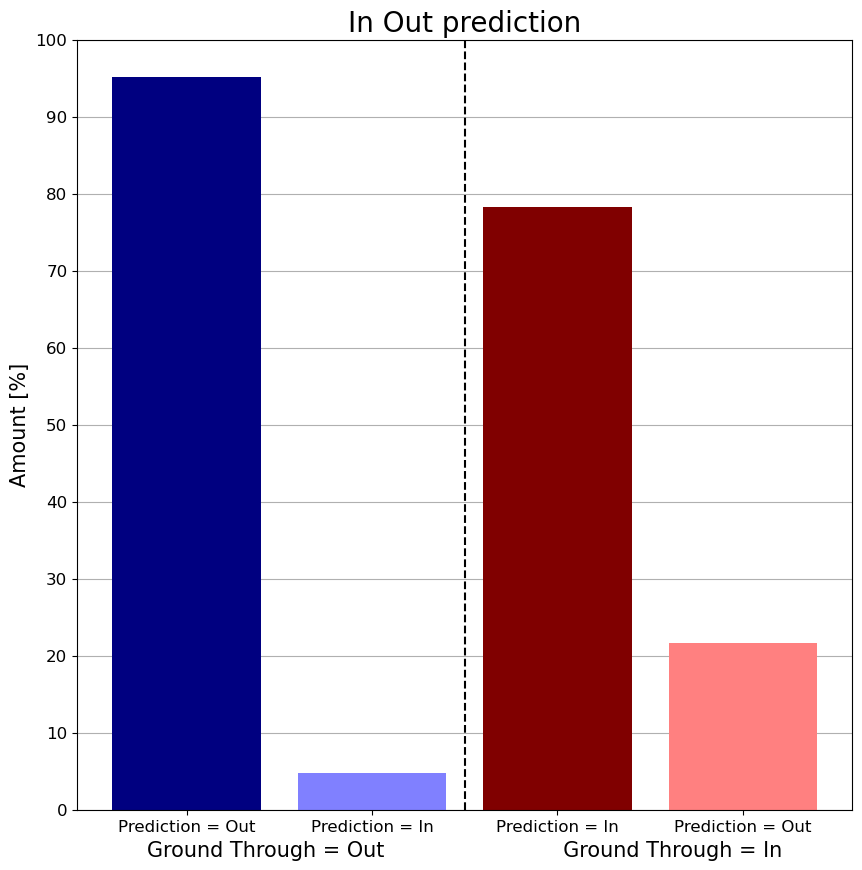

In [82]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('In Out prediction', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('Amount [%]', fontsize=15)
ax.set_xlabel('Ground Through = Out                           Ground Through = In', fontsize=15)
ax.set_axisbelow(True)

InOut_val = 1.5

out_out = 0
in_in = 0
in_out = 0
out_in = 0

for index, row in df.iterrows():
    if row['gt_rad'] > InOut_val and row['pred_rad'] > InOut_val:
        out_out += 1
    elif row['gt_rad'] < InOut_val and row['pred_rad'] < InOut_val:
        in_in += 1
    elif row['gt_rad'] < InOut_val and row['pred_rad'] > InOut_val:
        in_out += 1
    else:
        out_in += 1

# Plot bar chart
total_out = out_out + out_in
total_in = in_in + in_out
y = [out_out*100/total_out, out_in*100/total_out, in_in*100/total_in, in_out*100/total_in]

x = ['Prediction = Out', 'Prediction = In', 'Prediction = In', 'Prediction = Out']
x_pos = np.arange(len(x))

plt.bar(x_pos, y, align='center', color=[[0,0,0.5], [0.5,0.5,1], [0.5,0,0], [1,0.5,0.5]])
plt.xticks(x_pos, x)
plt.grid(axis='y')
plt.yticks(np.arange(100, -10, -10))


# Draw lines between the first two bars and the second two bars
plt.axvline(x=((x_pos[1]+(x_pos[2]))/2) , color='k', linestyle='--')

plt.savefig(os.path.join(save_path, 'In out prediction.png'))
plt.show()

angle error depending on location

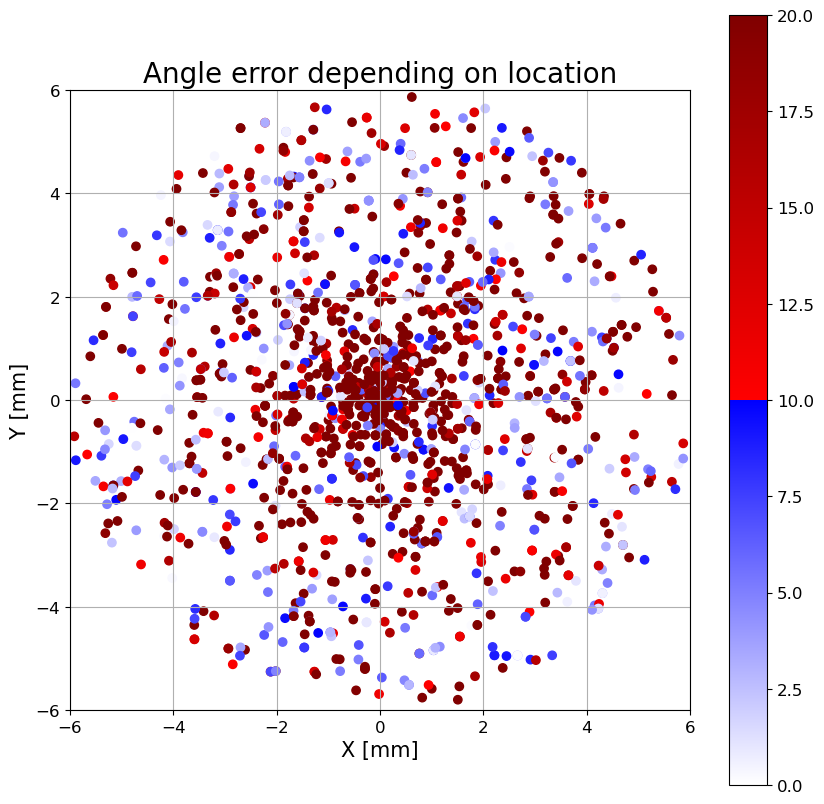

In [83]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Angle error depending on location', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('Y [mm]', fontsize=15)
ax.set_xlabel('X [mm]', fontsize=15)
ax.axis([-6, 6, -6, 6])
ax.set_aspect('equal')
ax.grid()

# Calculate error for each point
err = np.where(np.abs(pred_angles - gt_angles) < 180,
                      np.abs(pred_angles - gt_angles),
                      360 - np.abs(pred_angles - gt_angles))

# Calculate x and y coordinates based on radius and angle
x = gt_rads * np.sin(gt_angles)
y = gt_rads * np.cos(gt_angles)

# Plot scatter plot with error as color
colors1 = [(1, 1, 1), (0, 0, 1)]
colors2 = [(1, 0, 0), (0.5, 0, 0)]
cmap1 = LinearSegmentedColormap.from_list('blue', colors1)
cmap2 = LinearSegmentedColormap.from_list('red', colors2)
combined_cmap = ListedColormap([cmap1(i) for i in range(cmap1.N)] + [cmap2(i) for i in range(cmap2.N)])


sc = ax.scatter(x, y, c=err, cmap=combined_cmap)
cbar = plt.colorbar(sc)
cbar.ax.tick_params(labelsize=12)
sc.set_clim(0, 20)

plt.savefig(os.path.join(save_path, 'Angle error depending on location.png'))
plt.show()

rad error depending on location

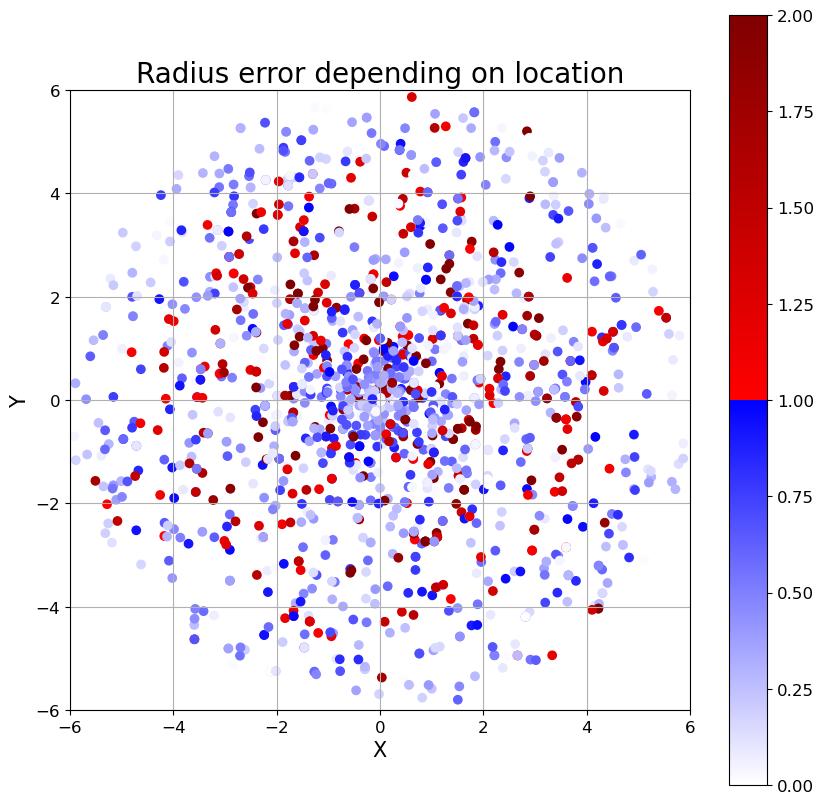

In [84]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Radius error depending on location', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('Y', fontsize=15)
ax.set_xlabel('X', fontsize=15)
ax.axis([-6, 6, -6, 6])
ax.set_aspect('equal')
ax.grid()

# Calculate error for each point
err = np.abs(gt_rads - pred_rads)

# Calculate x and y coordinates based on radius and angle
x = gt_rads * np.sin(gt_angles)
y = gt_rads * np.cos(gt_angles)

# Plot scatter plot with error as color
colors1 = [(1, 1, 1), (0, 0, 1)]
colors2 = [(1, 0, 0), (0.5, 0, 0)]
cmap1 = LinearSegmentedColormap.from_list('blue', colors1)
cmap2 = LinearSegmentedColormap.from_list('red', colors2)
combined_cmap = ListedColormap([cmap1(i) for i in range(cmap1.N)] + [cmap2(i) for i in range(cmap2.N)])


sc = ax.scatter(x, y, c=err, cmap=combined_cmap)
cbar = plt.colorbar(sc)
cbar.ax.tick_params(labelsize=12)
sc.set_clim(0, 2)

plt.savefig(os.path.join(save_path, 'Radius error depending on location.png'))
plt.show()